<a href="https://colab.research.google.com/github/prajwalkarnik08/Diabetes_Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [206]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection and pre-processing

**Data** **Understanding**

Diabetes Dataset
This dataset contains all the patients who are females of atleast 21 years of age of Indian heritage. I have taken this dataset from Kaggle.
The features in this dataset are:

1) Pregnencies: It tells the number of times the female is pregnent.

2) Glucose: It gives the amount of Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

3) Blood Pressure: It is Diastolic blood pressure measured in (mm Hg = millimeters of mercury).

4) Skin Thickness: It tells the amount of fat measured in triceps skin fold thickness in (mm).

5) Insulin: It is 2-hour serum insulin measured in (mu U/ml). Insulin is a hormone that lowers the level of glucose in the blood.

6) BMI: It is Body Mass Index. It is the ratio of weight in kg(kilograme) to the square of height in m(meter).

7) Diabetes Pedigree function: It is a function that scores the probability of diabetes based on family history, with a realistic range from 0.08 to 2.42.

8) Age: Age of the female which starts from 21.

9) Outcome: It consists of binary variable 0 and 1. 0 represents the healthy people and 1 represents those with diabetes.

**Data** **Collection**

In [207]:
df = pd.read_csv("diabetes.csv")

In [208]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [209]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There are no null values present in the data.


In [210]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


There are no object datatype. Dataset contains only numeric datatype.

In [211]:
df.shape

(768, 9)

In [212]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [214]:
df.iloc[:, -1].value_counts()

,count
Outcome,
0,500
1,268


The 0 indicates No diabetes and 1 indicates diabetes affected females. 268 females are prone to diabetes and 500 females are not prone to diabetes.

In [215]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Exploratory Data Analysis

In [216]:
preg = df.iloc[:,0].value_counts()
preg

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


<Axes: xlabel='Pregnancies', ylabel='count'>

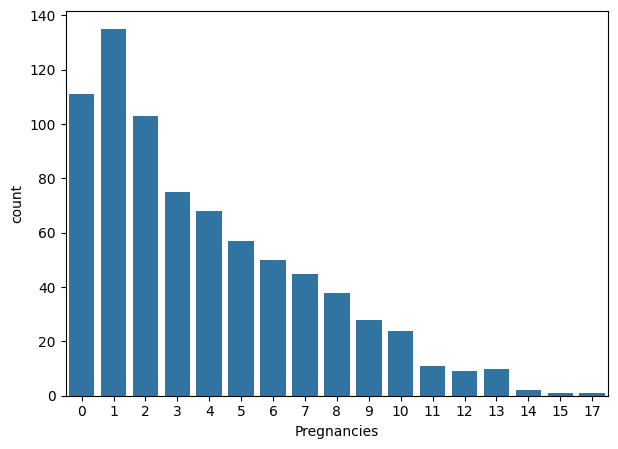

In [217]:
fig = plt.figure(figsize = (7,5))
sns.countplot(x="Pregnancies", data=df)

From the graph, we infer that the maximum females have given a birth to a single child, followed by no birth, 2 children and 3 children.

In [218]:
# Underweight females
bmi = df["BMI"]
a = bmi <= 18.5;
a1 = a.to_list();
def count(lst):
    return sum(bool(x) for x in lst);
print("The number of underweight females are {} as their BMI is less than 18.5.".format(count(a1)));
# Healthy weight
b = (bmi > 18.5) & (bmi <= 25);
b1 = b.to_list()
print("The number of healthy females are {} as their BMI is between than 18.5 and 25.".format(count(b1)))
# Overweight
c = (bmi > 25) & (bmi <= 30);
c1 = c.to_list();
print("The number of over weight females are {} as their BMI is between 25 and 30.".format(count(c1)))
# Obesed females
d = bmi > 30;
d1 = d.to_list();
print("The number of obesed females are {} as their BMI is over 30.".format(count(d1)))

The number of underweight females are 15 as their BMI is less than 18.5.
The number of healthy females are 108 as their BMI is between than 18.5 and 25.
The number of over weight females are 180 as their BMI is between 25 and 30.
The number of obesed females are 465 as their BMI is over 30.


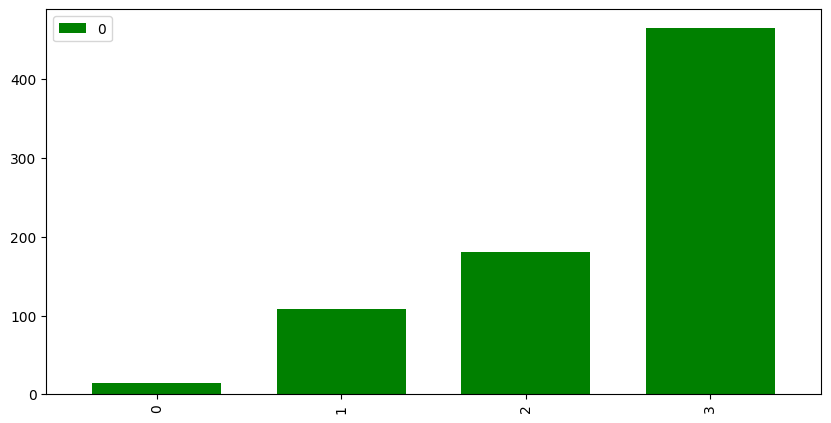

In [219]:
underwt_females = count(a1);
healthy_females = count(b1);
overwt_females = count(c1);
obesed_females = count(d1);
x = [underwt_females, healthy_females, overwt_females, obesed_females];
x1 = pd.DataFrame(x);

x1.plot(kind = "bar", color = "green", width = 0.7, figsize = (10,5));

From the above analysis, we can say the BMI index is more skewed towards the obesed females

In [220]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Age', ylabel='Pregnancies'>

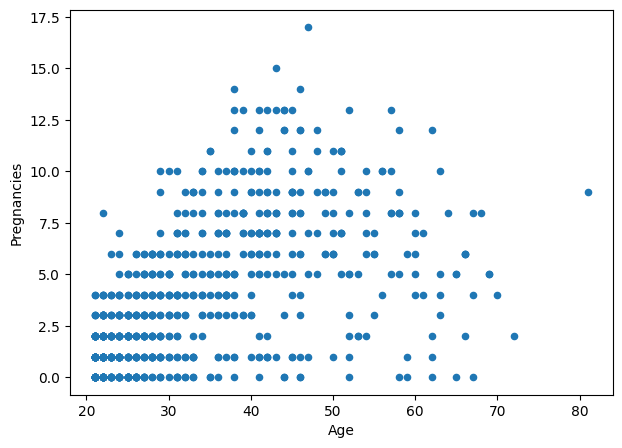

In [221]:
df.plot.scatter(x = "Age", y = "Pregnancies", figsize = (7,5))

There is quite positive trend in the number of pregnancies with age.

<Axes: xlabel='Insulin', ylabel='Glucose'>

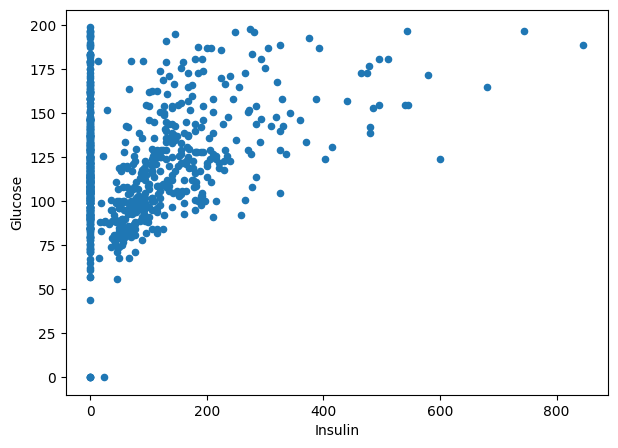

In [222]:
df.plot.scatter(x = "Insulin", y = "Glucose", figsize = (7,5))

When the Insulin level is very low, the glucose level is highest. There is slow increasing trend between glucose and insulin. But at the start, we see that glucose level is inversely proportional to the insulin level.

<Axes: xlabel='Age', ylabel='Insulin'>

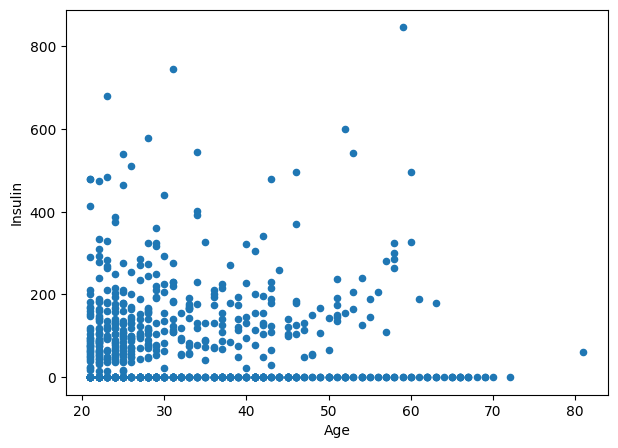

In [223]:
df.plot.scatter(x = "Age", y = "Insulin",figsize = (7,5))

From the graph, it is clear that there is insulin drop that can be seen linear in nature with age. Also, between age 50 t0 60 there is slight increase in the level of insulin.

Low level of Insulin causes diabetes. It can be said that, after the age of 62 more people are affected by diabetes.

Text(0, 0.5, 'Number of females')

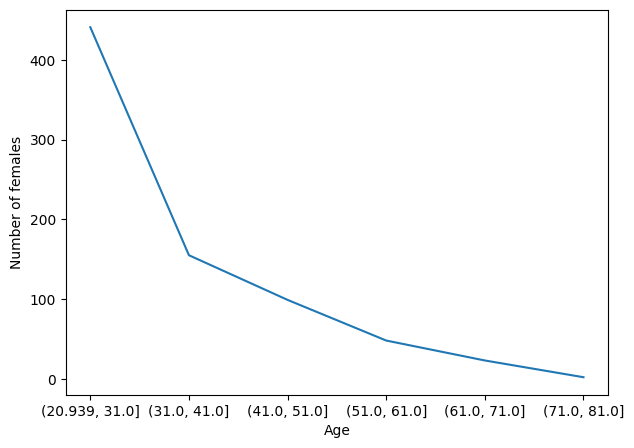

In [224]:
age_df = df["Age"].value_counts(bins = 6)
age_df.plot(kind = 'line')
plt.rcParams["figure.figsize"] = (7,5)
plt.xlabel("Age")
plt.ylabel("Number of females")

The maximum number of females are from the age group of 21 to 31 years. From the above analysis, it can be said that females from 21 to 31 years of age have not significancantly affected by diabetes.

<Axes: xlabel='BMI', ylabel='BloodPressure'>

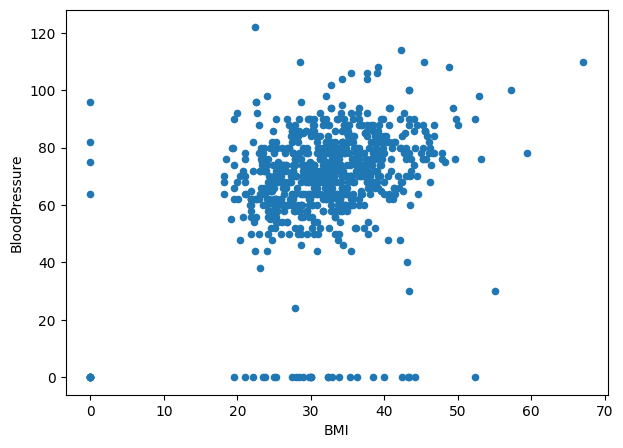

In [225]:
df.plot.scatter(x = "BMI", y = "BloodPressure", figsize = (7,5))

BMI and Blood Pressure are normally distributed.

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

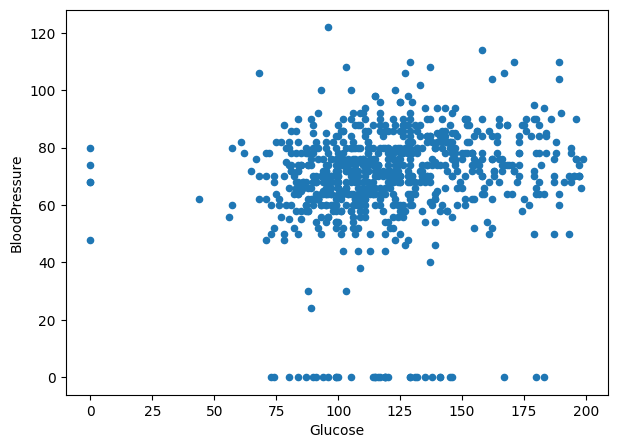

In [226]:
df.plot.scatter(x = "Glucose", y = "BloodPressure", figsize = (7,5))

Blood Pressure and Glucose level are linearly related.


<Axes: xlabel='Age', ylabel='BMI'>

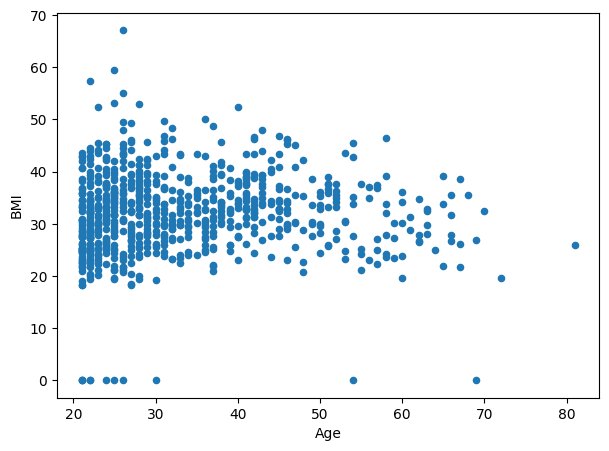

In [227]:
df.plot.scatter(x = "Age", y = "BMI", figsize = (7,5))

The females who have undergone 15 or more number of pregnancies are not prone to diabetes.

<Axes: xlabel='BMI'>

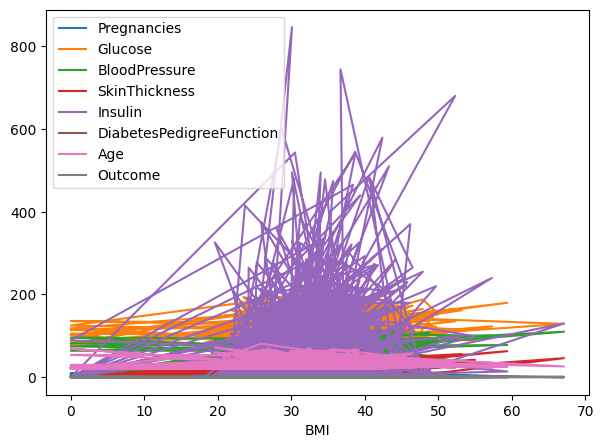

In [228]:
df.plot("BMI", figsize = (7,5))

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
73,1
171,1
255,1


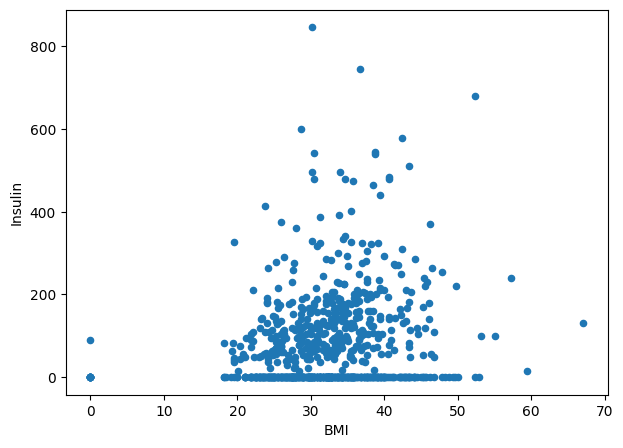

In [229]:
df.plot.scatter(x = "BMI", y = "Insulin", figsize = (7,5))
df["Insulin"].value_counts()

From the graph, it can be inferred that 20 to 50 age group people have 0 insulin level and has diabetes. The obesed females which are highest in number in 0 insulin level are prone to diabetes.

<Axes: xlabel='Outcome', ylabel='Insulin'>

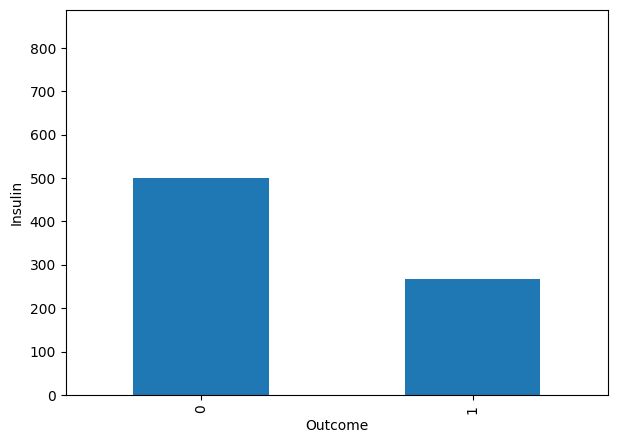

In [230]:
df.plot.scatter(x = "BMI", y = "Insulin", figsize = (7,5))
df.iloc[:, -1].value_counts().plot(kind = "bar")

In [231]:
age_df = pd.DataFrame(df["Age"].value_counts(sort = True, bins = 6))
age_df = age_df.rename(columns = {"Age" : "Age_Count"})
age_df

,count
"(20.939, 31.0]",441
"(31.0, 41.0]",155
"(41.0, 51.0]",99
"(51.0, 61.0]",48
"(61.0, 71.0]",23
"(71.0, 81.0]",2


In [232]:
insulin = df["Insulin"]
normal_insulin = (insulin > 5) & (insulin <= 40);
normal_insulin = normal_insulin.to_list()
print("The number of healthy females who are not prone to diabetes are {}.".format(count(normal_insulin)));

The number of healthy females who are not prone to diabetes are 19.


**Detecting** **Outliers**

Before capping and flooring outliers

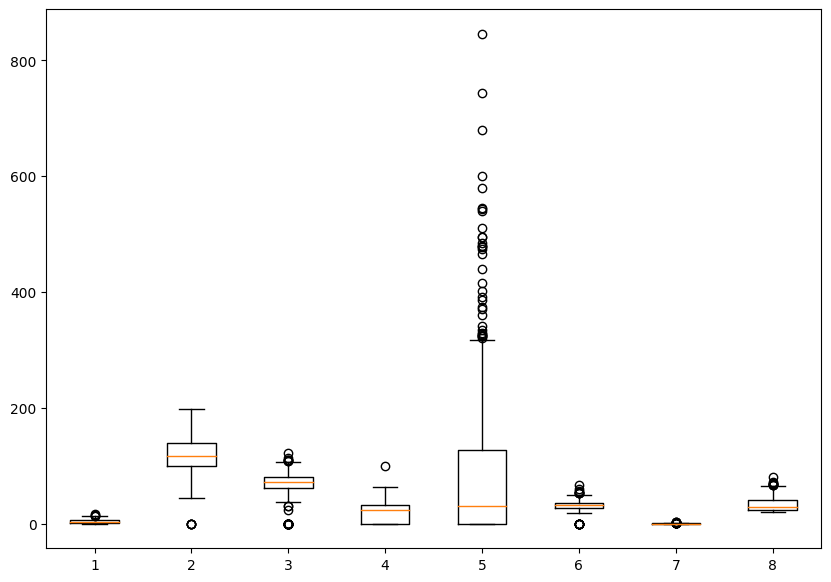

In [233]:
features1 = df.iloc[:, :-1]
fig = plt.figure(figsize = (10,7))
plt.boxplot(features1)
plt.show()

**Using** **Interquartile** **Range**

In [234]:
features = df.iloc[:, :-1]
def detect_outliers(features):
  for column in features.columns:
    Q1 = features[column].quantile(0.25)
    Q3 = features[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = features[(features[column] < lower_bound) | (features[column] > upper_bound)]
    print(f"Outliers in {column}: {outliers[column].to_list()}")

detect_outliers(features)

Outliers in Pregnancies: [15, 17, 14, 14]
Outliers in Glucose: [0, 0, 0, 0, 0]
Outliers in BloodPressure: [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]
Outliers in SkinThickness: [99]
Outliers in Insulin: [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]
Outliers in BMI: [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
Outliers in DiabetesPedigreeFunction: [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
Outliers in Age: [69, 67, 72, 81, 67, 67, 70, 68, 69]


**Removing** **Outliers** **using** **capping** **and** **fooring** **method**

This method limits extremely high values to a maximum limit and extremely low values to minimum limit. It is useful when there are genuine outliers and are extreme.

In [235]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in features.columns:
  features[column] = np.where(features[column] < lower_bound[column], lower_bound[column], features[column])
  features[column] = np.where(features[column] > upper_bound[column], upper_bound[column], features[column])
#print(features)
detect_outliers(features)
features.shape

Outliers in Pregnancies: []
Outliers in Glucose: []
Outliers in BloodPressure: []
Outliers in SkinThickness: []
Outliers in Insulin: []
Outliers in BMI: []
Outliers in DiabetesPedigreeFunction: []
Outliers in Age: []


(768, 8)

After capping and flooring outliers

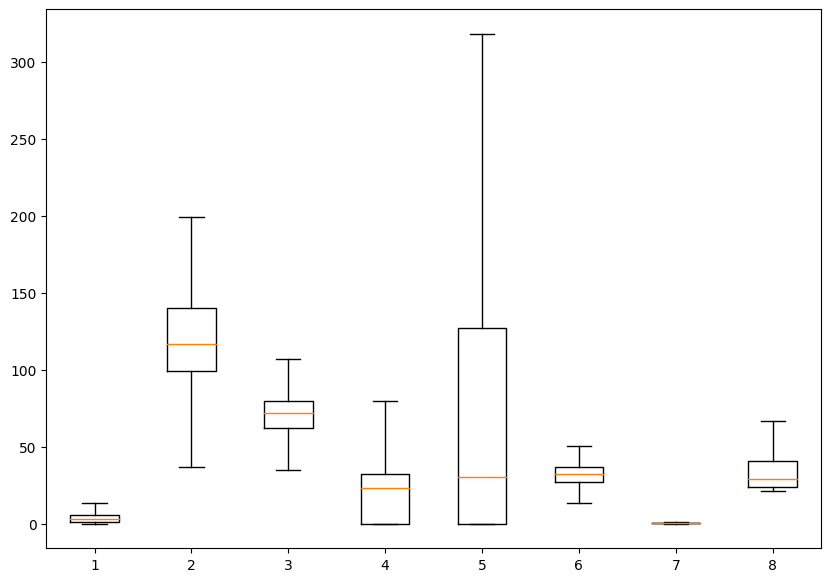

In [236]:
fig = plt.figure(figsize = (10,7))
plt.boxplot(features)
plt.show()

# Model Building

**Data** **Standardization**

In [237]:
# Seperating the dataset into features and target
X = features
y = df.iloc[:, -1]

In [238]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [239]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [240]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [241]:
print(standardized_data)

[[ 0.64714967  0.86192556  0.09269135 ...  0.20935933  0.58892732
   1.44569096]
 [-0.84896998 -1.15943299 -0.33020145 ... -0.78425421 -0.37810147
  -0.189304  ]
 [ 1.24559754  1.98490253 -0.47116571 ... -1.25267202  0.74659506
  -0.10325164]
 ...
 [ 0.34792574 -0.00437096  0.09269135 ... -0.84103213 -0.74949659
  -0.27535637]
 [-0.84896998  0.15605432 -0.75309424 ... -0.28744744 -0.38510892
   1.18753386]
 [-0.84896998 -0.90275254 -0.04827292 ... -0.24486401 -0.50423566
  -0.87772293]]


In [242]:
X = standardized_data
y = df["Outcome"]

In [243]:
print(X)

[[ 0.64714967  0.86192556  0.09269135 ...  0.20935933  0.58892732
   1.44569096]
 [-0.84896998 -1.15943299 -0.33020145 ... -0.78425421 -0.37810147
  -0.189304  ]
 [ 1.24559754  1.98490253 -0.47116571 ... -1.25267202  0.74659506
  -0.10325164]
 ...
 [ 0.34792574 -0.00437096  0.09269135 ... -0.84103213 -0.74949659
  -0.27535637]
 [-0.84896998  0.15605432 -0.75309424 ... -0.28744744 -0.38510892
   1.18753386]
 [-0.84896998 -0.90275254 -0.04827292 ... -0.24486401 -0.50423566
  -0.87772293]]


In [244]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Train** **Test** **Split**

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [246]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Training** **the** **model**

In [247]:
classifier = SVC(kernel = 'linear')

In [248]:
# training the support vector machine classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Model Evaluation

**Accuracy** **score**

In [249]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [250]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7850162866449512


In [251]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [252]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


# Making a predictive System

In [253]:
input_data = [8,183,64,0,0,23.3,0.672,32]

# changing the input_data into numpy array
input_data_as_np_arr = np.asarray(input_data)

# reshape the array as we are predictiong for one instance
input_data_reshaped = input_data_as_np_arr.reshape(1,-1)
# Standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The female is non-diabetic")

else:
    print("The female is diabetic")


[[ 1.24559754  1.98490253 -0.47116571 -1.29538762 -0.787602   -1.25267202
   0.74659506 -0.10325164]]
[1]
The female is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
